# Skoki študentke v Biomehanskem lab. ZF 27. marca 2024

## Potrebne knjižnice in funkcije
Vsebino spodnje celice je potrebno izvesti le enkrat. Ker ves proces poteka v spletnem brskalniku vaše naprave, lahko ta korak traja nekaj časa.

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import sys,os
import matplotlib.pyplot as plt
%pip install -q ipympl
%matplotlib widget

def Raw_Filtered_Plot(t,y,fy,measurement='Measurement',xlabel='x',ylabel='y',legend=True,filter=True):
    '''Plot Raw and Filtered data over time'''
    fig = plt.figure()
    plt.plot(t,y,label=f'Neobdelani podatki')# LDJ = {ldj:.0f}')
    if filter: plt.plot(t,fy,label=f'Filtrirani podatki')# LDJ = {ldjf:.0f}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(measurement)
    if legend: plt.legend(loc='upper right')
    plt.show()

def AnalyzeSignal(d,ydataNo,order=8,CNr=0.1,Start=0,Interval=0,plot=True,legend=True,filter=True):
    '''Get Raw and Filtered data. Using Lowpass Butterworth filter with order=order and Cnr=f_crit/f_Nyquist'''
    
    # Get sampling frequency over the whole interval (cutting off cut first and last points)
    cut = 0
    t, y = [d.iloc[:,col][cut:-(cut+1)] for col in (0,ydataNo)]
    dtlist = t.diff()[1:]
    fslist = 1/dtlist # Sampling frequency
    fs, sfs = np.average(fslist),np.std(fslist)
    sampling = f', Vzorčenje: $\\nu$ = {fs:.0f} Hz, $\sigma_\\nu =$ {sfs:.0f} Hz'
    
    # Filter and plot interval given in seconds
    if Interval == 0:
        Intervals = len(d)-int(Start*fs)
    else:
        Intervals = int(Interval*fs)
    Starts = int(Start*fs)
    t, y = [d.iloc[:,col][Starts:Starts+Intervals] for col in (0,ydataNo)]
    b, a = signal.butter(order, CNr * (0.5*fs), fs = fs) # Lowpass Butterworth filter with order=order and Cnr=f_crit/f_Nyquist
    fy = signal.filtfilt(b, a, y) # Apply filter forward and backward to a signal
    Raw_Filtered_Plot(t,y,fy,
                      measurement,
                      xlabel=d.columns[0]+sampling,
                      ylabel=d.columns[ydataNo],
                      legend=legend,
                      filter=filter)
    return #t, y, fy

## Analiza merskih podatkov aplikacije PhyPhox

In [20]:
measurement = 'data/3skoki_studentka_PhyPhox.csv'
print(f'Berem datoteko: \"{measurement}\"')
df1 = pd.read_csv(measurement) # za PhyPhox
df1

Berem datoteko: "data/3skoki_studentka_PhyPhox.csv"


,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000128,10.226584,0.469424,0.321681,10.242405
1,0.010149,11.031759,-0.332758,-0.330064,11.041711
2,0.020170,11.941867,-1.269959,-0.852477,12.039423
3,0.030190,12.691658,-2.106420,-1.073717,12.909998
4,0.040211,12.910203,-2.652484,-0.935704,13.213045
...,...,...,...,...,...
4576,45.856342,9.860146,-0.158670,-1.121917,9.925036
4577,45.866364,9.872121,-0.095501,-1.112487,9.935065
4578,45.876385,9.818383,-0.051343,-1.076861,9.877393
4579,45.886406,9.744436,-0.027692,-1.005010,9.796165


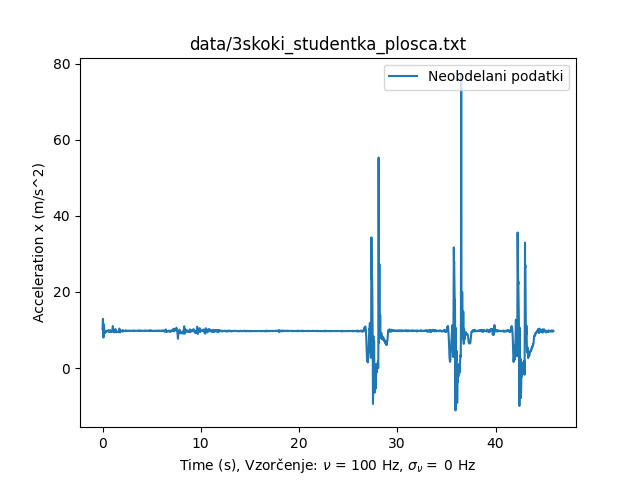

In [31]:
# Izberi podatke in interval izrisa
ydataNo = 1 # Zaporedna številka stolpca za analizo
Start = 0 # Začetek prikazanega intervala [s]
Interval = 0  # Dolžina prikazanega intervala [s]. Izberi 0 za celoten interval.

# Filtriranje signala z Butterworthovim filtrom (odreže visoke frekvence):
order = 5 # Red filtra. Lahko pustite kar 5.
CNr = 0.1 #  Poskusite 0.01 and 0.1. Izbira je možna v intervalu (0,1). CNr predstavlja f_crit/f_Nyquist filtra. 

AnalyzeSignal(df1,ydataNo,order,CNr, Start,Interval,legend=True,filter=False)

### Izračun višine skoka

Iz analize pospeškov poskusite izmeriti čas skoka ($t$) in iz tega višino skoka po enačbi $h=g t^2/8$. Primerjajte dobljeni rezultat s preprosto meritvijo z merskim trakom oziroma vašo oceno višine skoka.

In [22]:
to = 11.88 # Čas odskoka
td = 12.32 # Čas doskoka

In [23]:
t = td - to
g = 9.81
h = g * t**2 / 8
print(f'Višina skoka: h = {h*100:.1f} cm')

Višina skoka: h = 23.7 cm


## Analiza merskih podatkov pritiskovne plošče

In [24]:
measurement = 'data/3skoki_studentka_plosca.txt'
print(f'Berem datoteko: \"{measurement}\"')
df2 = pd.read_csv(measurement,sep='\t',header=11,skiprows=[12]) # za BioWare 3.0 (pritiskovna plošča)
df2

Berem datoteko: "data/3skoki_studentka_plosca.txt"


,abs time (s),Fx,Fy,Fz,Ft
0,0.000,-1.587649,1.360515,579.501198,579.504970
1,0.005,-1.704250,0.973730,576.932281,576.935620
2,0.010,-2.171548,0.624633,574.879177,574.883618
3,0.015,-2.054649,0.664384,575.305466,575.309518
4,0.020,-1.392619,1.089683,578.557018,578.559721
...,...,...,...,...,...
6528,32.640,-0.099344,-0.167231,-0.008585,0.194702
6529,32.645,0.211691,0.065088,1.189698,1.210137
6530,32.650,0.445192,0.490799,3.585827,3.646537
6531,32.655,0.094495,0.027813,2.046033,2.048403


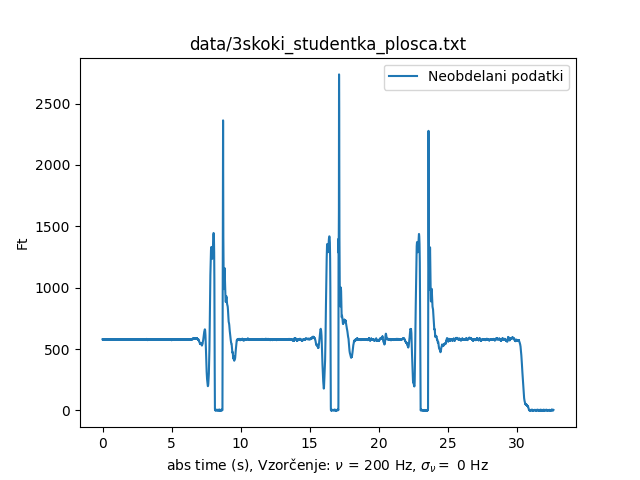

In [25]:
# Izberi podatke in interval izrisa
ydataNo = 4 # Zaporedna številka stolpca za analizo
Start = 0 # Začetek prikazanega intervala [s]
Interval = 0  # Dolžina prikazanega intervala [s]. Izberi 0 za celoten interval.

# Filtriranje signala z Butterworthovim filtrom (odreže visoke frekvence):
order = 5 # Red filtra. Lahko pustite kar 5.
CNr = 0.1 #  Poskusite 0.01 and 0.1. Izbira je možna v intervalu (0,1). CNr predstavlja f_crit/f_Nyquist filtra. 

AnalyzeSignal(df2,ydataNo,order,CNr, Start,Interval,legend=True,filter=False)

### Izračun višine skoka

Iz analize pospeškov poskusite izmeriti čas skoka ($t$) in iz tega višino skoka po enačbi $h=g t^2/8$. Primerjajte dobljeni rezultat s preprosto meritvijo z merskim trakom oziroma vašo oceno višine skoka.

In [26]:
to = 11.88 # Čas odskoka
td = 12.32 # Čas doskoka

In [27]:
t = td - to
g = 9.81
h = g * t**2 / 8
print(f'Višina skoka: h = {h*100:.1f} cm')

Višina skoka: h = 23.7 cm
